In [1]:
import shutil
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,Flatten
from keras.preprocessing import  sequence
import glob
import keras.layers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
from scipy import stats
from sklearn.utils import resample

In [4]:
# Set the source and destination directories
source = '/Users/jaredperez/Downloads/Model Data/'
dst = '/Users/jaredperez/' #Don't Need to Run again

# Move the folder
shutil.move(source, dst)

'/Users/jaredperez/Model Data'

In [2]:
root_dir = glob.glob('/Users/jaredperez/Portfolio Project 3 Exam Performance/Data/Data/*/*/*')
file_names = ['info', 'tags']

In [3]:
#Delete erroneous info.txt and tags.csv files
for files in root_dir:
    if os.path.splitext(os.path.basename(files))[0] in file_names:
        x=files
        os.remove(x)

In [4]:
#Load the Data and attach labels to each of the files for each exam

def data_upload(x):
    dfs={"IBI": [],
     "ACC":[],
     'EDA':[],
     'HR':[],
     'TEMP':[],
     'BVP':[]}
    for files in glob.glob('/Users/jaredperez/Portfolio Project 3 Exam Performance/Data/Data/*/*/*'):
        key = os.path.splitext(os.path.basename(files))[0]
        df=pd.read_csv(files, header=None, skiprows=[0,1], on_bad_lines='skip')
        df['Subject']=files.split('/')[-3]
        df['Test']=files.split('/')[-2]
        dfs[key].append(df)
    return dfs

In [5]:
dfs=data_upload('x')

In [6]:
from collections import defaultdict

In [8]:
from collections import defaultdict #Concatenate dataframes by sensor and Test

final_dfs = defaultdict(dict)
for key, value in dfs.items():
    df_dict = defaultdict(list) #test(midterm 2, etc) didn't exist, so defaultdict(list) allows creation of key "Test"
    for df in value:
        df_dict[df['Test'].iloc[0]].append(df) 
    for test, df_group in df_dict.items(): #test key is midterm 1/2/final
        final_dfs[key][test] = pd.concat(df_group)

In [11]:
def map_values(row):
    test = row['Test']
    subject = row['Subject']
    return scores[test][subject] #scores=name of scores variable

In [12]:
midterm_1={'S1' : 78/100,
           'S2' : 82/100,
           'S3' : 77/100,
           'S4' : 75/100,
           'S5' : 67/100,
           'S6' : 71/100,
           'S7' : 64/100,
           'S8' : 92/100,
           'S9' : 80/100,
           'S10' : 89/100}



midterm_2={'S1' : 82/100,
           'S2' : 85/100,
           'S3' : 90/100,
           'S4' : 77/100,
           'S5' : 77/100,
           'S6' : 64/100,
           'S7' : 33/100,
           'S8' : 88/100,
           'S9' : 39/100,
           'S10' : 64/100}



final={'S1' : 182/200,
       'S2' : 180/200,
       'S3' : 188/200,
       'S4' : 149/200,
       'S5' : 157/200,
       'S6' : 175/200,
       'S7' : 110/200,
       'S8' : 184/200,
       'S9' : 126/200,
       'S10' : 116/200}


scores=defaultdict(dict)
scores['Midterm 1']=midterm_1
scores['Midterm 2']=midterm_2
scores['Final']=final

In [13]:
scores['Midterm 2']

{'S1': 0.82,
 'S2': 0.85,
 'S3': 0.9,
 'S4': 0.77,
 'S5': 0.77,
 'S6': 0.64,
 'S7': 0.33,
 'S8': 0.88,
 'S9': 0.39,
 'S10': 0.64}

In [14]:
midterm_1_scores=list(scores['Midterm 1'].values())
midterm_2_scores=list(scores['Midterm 2'].values())
final_scores=list(scores['Final'].values())

In [15]:
def print_subject_score_max(test):
    keys=list(scores[test].keys())
    values=list(scores[test].values())
    max_value=max(values)
    index=values.index(max_value)
    return keys[index]

def print_subject_score_min(test):
    keys=list(scores[test].keys())
    values=list(scores[test].values())
    min_value=min(values)
    index=values.index(min_value)
    return keys[index]

In [16]:
print_subject_score_min('Midterm 1')

'S7'

In [17]:
print(f"Midterm 1 mean value is {np.mean(midterm_1_scores)}")
print(f"Midterm 2 mean value is {np.mean(midterm_2_scores)}")
print(f"Final mean value is {np.mean(final_scores)}")

print(f"Midterm 1 Max value is {(max(list(scores['Midterm 1'].values())))} and belongs to {print_subject_score_max('Midterm 1')}")
print(f"Midterm 2 Max value is {(max(list(scores['Midterm 2'].values())))} and belongs to {print_subject_score_max('Midterm 2')}")
print(f"Midterm 1 Max value is {(max(list(scores['Final'].values())))} and belongs to {print_subject_score_max('Final')}")


print(f"Midterm 1 Min value is {(min(list(scores['Midterm 1'].values())))} and belongs to {print_subject_score_min('Midterm 1')}")
print(f"Midterm 2 Min value is {(min(list(scores['Midterm 2'].values())))} and belongs to {print_subject_score_min('Midterm 2')}")
print(f"Midterm 1 Min value is {(min(list(scores['Final'].values())))} and belongs to {print_subject_score_min('Final')}")

Midterm 1 mean value is 0.775
Midterm 2 mean value is 0.699
Final mean value is 0.7835
Midterm 1 Max value is 0.92 and belongs to S8
Midterm 2 Max value is 0.9 and belongs to S3
Midterm 1 Max value is 0.94 and belongs to S3
Midterm 1 Min value is 0.64 and belongs to S7
Midterm 2 Min value is 0.33 and belongs to S7
Midterm 1 Min value is 0.55 and belongs to S7


In [18]:
for key, value in final_dfs.items():
    for df, value2 in value.items():
        value2['Score']=value2.apply(map_values, axis=1)

In [9]:
%store final_dfs

UsageError: Unknown variable 'final_dfs'


In [7]:
%store -r final_dfs


In [8]:
IBI=pd.concat(final_dfs['IBI']).reset_index().drop(columns=['level_0', 'level_1'])
ACC=pd.concat(final_dfs['ACC']).reset_index().drop(columns=['level_1', 'level_0'])
EDA=pd.concat(final_dfs['EDA']).reset_index().drop(columns=['level_1', 'level_0'])
HR=pd.concat(final_dfs['HR']).reset_index().drop(columns=['level_1', 'level_0'])
BVP=pd.concat(final_dfs['BVP']).reset_index().drop(columns=['level_1', 'level_0'])
TEMP=pd.concat(final_dfs['TEMP']).reset_index().drop(columns=['level_1', 'level_0'])

In [9]:
BVP_Midterm_2=BVP[BVP['Test']=='Midterm 2']

In [10]:
test=BVP_Midterm_2[BVP_Midterm_2['Subject']=='S5']

<AxesSubplot:>

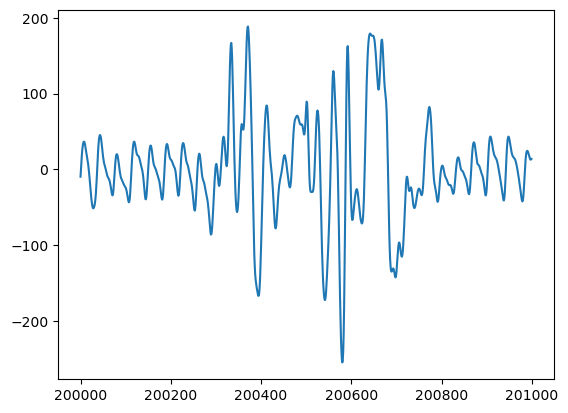

In [11]:
test[0].iloc[200000:201000].plot()

In [ ]:
#How do i want to modify the data? Midterm 2=Lowest Scores...performance under Stress Conditions?
    #Look up data augmentation for 1D data...it is used in image recognition but perhaps I can do something similar
    #with time series data

#First lets build a classifier to see if it can classifiy between the different tests...Essentially identical
    #cconditions. Interesting to see if physiological data can differentiate between exames
    
#Validate the classification model of subjects again with appropriate data

#Subsample to cluster data and create samples...Use Autoencoder to filter out noise
    #Subsample all the 70-80% scores, all 80-90% etc. and see if clustering analysis can detect anything
    
#Build general model, fine tune for individuals...

In [28]:
BVP

,0,Subject,Test,Score
0,-0.00,S5,Midterm 2,0.77
1,-0.00,S5,Midterm 2,0.77
2,-0.00,S5,Midterm 2,0.77
3,-0.00,S5,Midterm 2,0.77
4,-0.00,S5,Midterm 2,0.77
...,...,...,...,...
28370513,-0.91,S9,Final,0.63
28370514,-0.89,S9,Final,0.63
28370515,-0.93,S9,Final,0.63
28370516,-1.09,S9,Final,0.63


In [9]:
from sklearn.utils import resample

In [30]:
def equal_samples(df, unique_indexes): #DONT USE..INCORRECTLY MODIFIES SAMPLE RATES
    resampled_dfs = []
    for subject_value in unique_indexes:
        frame = df[df['Subject'] == subject_value]
        df_resampled = resample(frame, replace=True, n_samples=int(len(df)/10))
        resampled_dfs.append(df_resampled)
    resampled_df = pd.concat(resampled_dfs)
    return resampled_df

In [158]:
mini

,0,Subject
0,-0.00,S5
1,-0.00,S5
2,-0.00,S5
3,-0.00,S5
4,-0.00,S5
...,...,...
4999995,0.79,S1
4999996,0.72,S1
4999997,0.83,S1
4999998,1.11,S1


<AxesSubplot:>

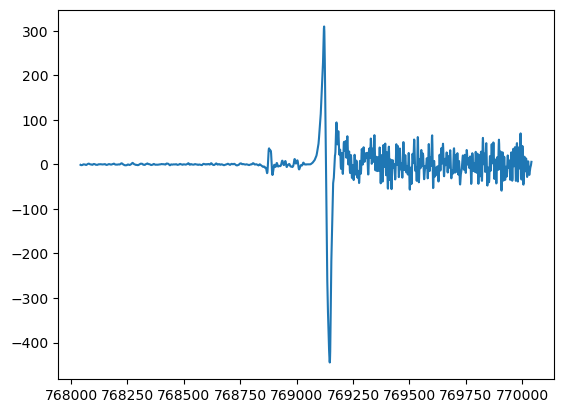

In [68]:
mini[0][768042:770042].plot() #Visualize Data

In [164]:
resmapled=resample(mini, replace=True, n_samples=10000000)

In [165]:
resampled=resmapled.sort_index()

In [166]:
resampled=resampled.reset_index()

In [167]:
resampled[resampled['Subject']=='S5']

,index,0,Subject
0,0,-0.00,S5
1,0,-0.00,S5
2,1,-0.00,S5
3,2,-0.00,S5
4,2,-0.00,S5
...,...,...,...
1538809,769040,-0.36,S5
1538810,769041,-0.47,S5
1538811,769041,-0.47,S5
1538812,769041,-0.47,S5


<AxesSubplot:>

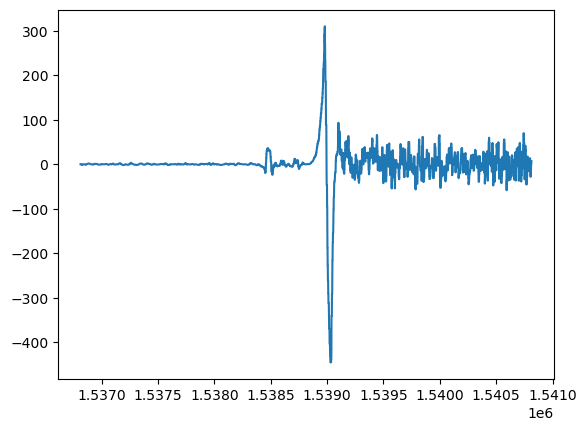

In [181]:
resampled[0][1538813-2000:1538813+2000].plot() #Visualize after resample should look the same

In [79]:
IBI_test=IBI[[0,1]]

In [83]:
IBI

,0,1,Subject,Test,Score
0,61.799704,0.546900,S5,Midterm 2,0.77
1,68.190621,0.531274,S5,Midterm 2,0.77
2,70.018830,0.421894,S5,Midterm 2,0.77
3,70.378222,0.359391,S5,Midterm 2,0.77
4,70.706362,0.328140,S5,Midterm 2,0.77
...,...,...,...,...,...
43869,13652.296802,0.484397,S9,Final,0.63
43870,13652.859328,0.562526,S9,Final,0.63
43871,13660.765939,0.468771,S9,Final,0.63
43872,13661.344091,0.578151,S9,Final,0.63


In [80]:
IBI_test

,0,1
0,61.799704,0.546900
1,68.190621,0.531274
2,70.018830,0.421894
3,70.378222,0.359391
4,70.706362,0.328140
...,...,...
43869,13652.296802,0.484397
43870,13652.859328,0.562526
43871,13660.765939,0.468771
43872,13661.344091,0.578151


In [81]:
equal_IBI=resample(IBI, replace=True, n_samples=int(len((IBI_test)/10)*2))

In [85]:
equal_IBI=equal_IBI.sort_index().reset_index().drop(columns='index')

In [89]:
uniques=IBI['Subject'].unique()

In [90]:
test_2=equal_samples(IBI, uniques)

<AxesSubplot:>

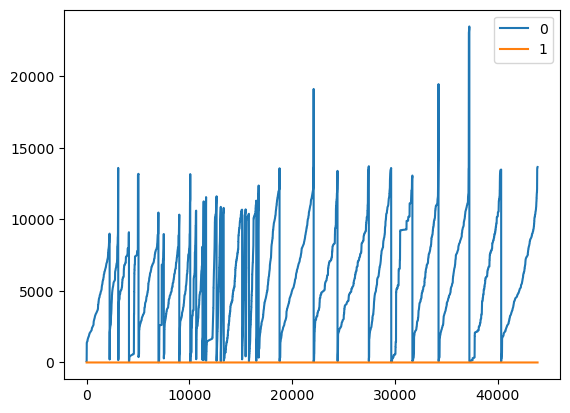

In [94]:
test_2[[0,1]].plot()

<AxesSubplot:>

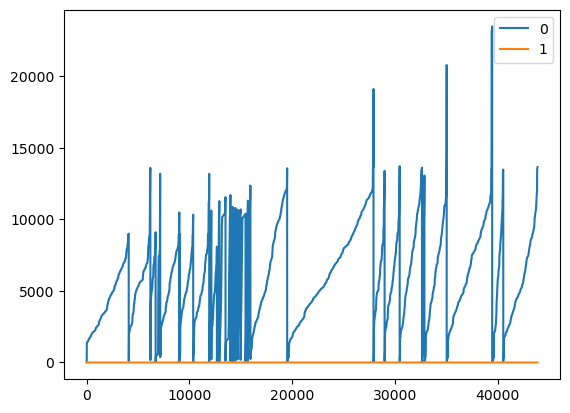

In [95]:
IBI[[0,1]].plot()

In [99]:
IBI['Subject'].value_counts() #Resample up to 64 Hz for everyone and then picl random sample

S2     11107
S5      7911
S6      6463
S10     4295
S9      4115
S1      3755
S4      2127
S3      2067
S7      1527
S8       507
Name: Subject, dtype: int64

In [11]:
length=len(BVP) #resample all data to 64 Hz

signals=[BVP, ACC, EDA, TEMP, HR] #Removing IBI Data

signals=[resample(i, replace=True, n_samples=length) for i in signals]

In [12]:
BVP=signals[0]
ACC=signals[1]
EDA=signals[2]
TEMP=signals[3]
HR=signals[4]

signals=[i.sort_index().reset_index(drop=True) for i in signals]

BVP=signals[0]
ACC=signals[1]
EDA=signals[2]
TEMP=signals[3]
HR=signals[4]

In [22]:
IBI['Subject'].value_counts() #Keeps correct proportion of samples

S2     7180134
S5     5117155
S6     4178790
S10    2776742
S9     2661110
S1     2428457
S4     1374136
S3     1337311
S7      987814
S8      328869
Name: Subject, dtype: int64

In [23]:
big_test=pd.concat([signals[0], signals[1]], axis=1)

In [25]:
mapper=['BVP_Signal', 'BVP_Subject', 'BVP_Test', 'BVP_Score', 'x','y','z','ACC_Subject', "ACC_Test", "ACC_Score"]

In [26]:
big_test.columns=mapper

In [27]:
big_test

,BVP_Signal,BVP_Subject,BVP_Test,BVP_Score,x,y,z,ACC_Subject,ACC_Test,ACC_Score
0,-0.00,S5,Midterm 2,0.77,-1,-63,5,S5,Midterm 2,0.77
1,-0.00,S5,Midterm 2,0.77,-1,-63,5,S5,Midterm 2,0.77
2,-0.00,S5,Midterm 2,0.77,-1,-63,5,S5,Midterm 2,0.77
3,-0.00,S5,Midterm 2,0.77,-1,-63,5,S5,Midterm 2,0.77
4,-0.00,S5,Midterm 2,0.77,-1,-63,5,S5,Midterm 2,0.77
...,...,...,...,...,...,...,...,...,...,...
28370513,-0.81,S9,Final,0.63,40,-34,-37,S9,Final,0.63
28370514,-0.89,S9,Final,0.63,40,-34,-37,S9,Final,0.63
28370515,-0.89,S9,Final,0.63,40,-34,-37,S9,Final,0.63
28370516,-1.09,S9,Final,0.63,36,-36,-34,S9,Final,0.63


In [148]:
print(len(big_test[big_test['BVP_Subject']=='S1'])) #Not identical but pretty similar amounts
print(len(big_test[big_test['ACC_Subject']=='S1']))

print(len(big_test[big_test['BVP_Test']=='Midterm 1'])) 
print(len(big_test[big_test['ACC_Test']=='Midterm 2']))

2928630
2926799
7538753
7747237


In [28]:
EDA[EDA['Subject']=='S5']

,0,Subject,Test,Score
0,0.0,S5,Midterm 2,0.770
1,0.0,S5,Midterm 2,0.770
2,0.0,S5,Midterm 2,0.770
3,0.0,S5,Midterm 2,0.770
4,0.0,S5,Midterm 2,0.770
...,...,...,...,...
16261471,0.0,S5,Final,0.785
16261472,0.0,S5,Final,0.785
16261473,0.0,S5,Final,0.785
16261474,0.0,S5,Final,0.785


In [14]:
EDA_OG=pd.concat(final_dfs['EDA'], axis=0)

In [30]:
EDA_OG=EDA_OG.reset_index(drop=True)

In [15]:
len(EDA)-len(EDA_OG)

26597398

In [32]:
EDA_OG[EDA_OG['Subject']=='S5']

,0,Subject,Test,Score
0,0.000000,S5,Midterm 2,0.770
1,0.002562,S5,Midterm 2,0.770
2,0.021776,S5,Midterm 2,0.770
3,0.021776,S5,Midterm 2,0.770
4,0.019214,S5,Midterm 2,0.770
...,...,...,...,...
1016257,0.000000,S5,Final,0.785
1016258,0.000000,S5,Final,0.785
1016259,0.000000,S5,Final,0.785
1016260,0.000000,S5,Final,0.785


<AxesSubplot:>

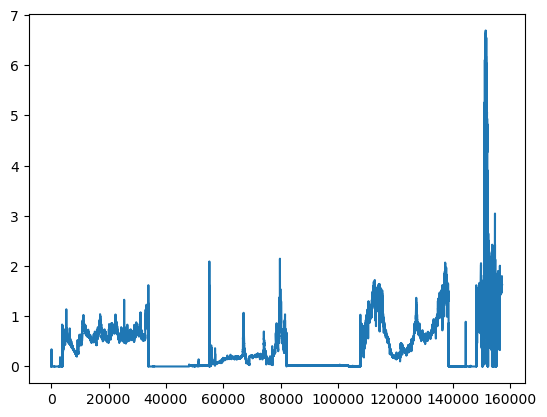

In [187]:
EDA_OG[0][:157068].plot() #Data looks the same...good to go

<AxesSubplot:>

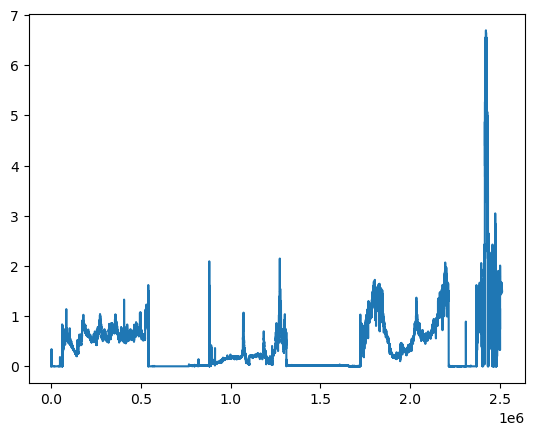

In [188]:
EDA[0][:2512834].plot() #Determined end point by index of which a specific subject ended

In [189]:
big_test #Data is imbalanced but not inherently a problem

,BVP_Signal,BVP_Subject,BVP_Test,BVP_Score,x,y,z,ACC_Subject,ACC_Test,ACC_Score
0,-0.00,S5,Midterm 2,0.77,-1,-63,5,S5,Midterm 2,0.77
1,-0.00,S5,Midterm 2,0.77,-1,-63,5,S5,Midterm 2,0.77
2,-0.00,S5,Midterm 2,0.77,-1,-63,5,S5,Midterm 2,0.77
3,-0.00,S5,Midterm 2,0.77,-1,-63,5,S5,Midterm 2,0.77
4,-0.00,S5,Midterm 2,0.77,-1,-63,5,S5,Midterm 2,0.77
...,...,...,...,...,...,...,...,...,...,...
28370513,-1.09,S9,Final,0.63,39,-34,-37,S9,Final,0.63
28370514,-1.09,S9,Final,0.63,39,-32,-37,S9,Final,0.63
28370515,-1.43,S9,Final,0.63,40,-34,-37,S9,Final,0.63
28370516,-1.43,S9,Final,0.63,40,-34,-37,S9,Final,0.63


In [33]:
big_test[big_test['BVP_Subject']=='S5']

,BVP_Signal,BVP_Subject,BVP_Test,BVP_Score,x,y,z,ACC_Subject,ACC_Test,ACC_Score
0,-0.00,S5,Midterm 2,0.770,-1,-63,5,S5,Midterm 2,0.770
1,-0.00,S5,Midterm 2,0.770,-1,-63,5,S5,Midterm 2,0.770
2,-0.00,S5,Midterm 2,0.770,-1,-63,5,S5,Midterm 2,0.770
3,-0.00,S5,Midterm 2,0.770,-1,-63,5,S5,Midterm 2,0.770
4,-0.00,S5,Midterm 2,0.770,-1,-63,5,S5,Midterm 2,0.770
...,...,...,...,...,...,...,...,...,...,...
16260193,-0.87,S5,Final,0.785,-2,-2,-63,S5,Final,0.785
16260194,-4.39,S5,Final,0.785,-2,-2,-62,S5,Final,0.785
16260195,-4.39,S5,Final,0.785,-2,-2,-63,S5,Final,0.785
16260196,-4.39,S5,Final,0.785,-2,-2,-63,S5,Final,0.785


In [34]:
S5_test=big_test[big_test['BVP_Subject']=='S5']

In [35]:
S5_test=S5_test.reset_index(drop=True)

In [199]:
S5_test.drop(index=list(range(2000000,2514335))) #So I can do this, good

,BVP_Signal,BVP_Subject,BVP_Test,BVP_Score,x,y,z,ACC_Subject,ACC_Test,ACC_Score
0,-0.00,S5,Midterm 2,0.770,-1,-63,5,S5,Midterm 2,0.770
1,-0.00,S5,Midterm 2,0.770,-1,-63,5,S5,Midterm 2,0.770
2,-0.00,S5,Midterm 2,0.770,-1,-63,5,S5,Midterm 2,0.770
3,-0.00,S5,Midterm 2,0.770,-1,-63,5,S5,Midterm 2,0.770
4,-0.00,S5,Midterm 2,0.770,-1,-63,5,S5,Midterm 2,0.770
...,...,...,...,...,...,...,...,...,...,...
1999996,15.79,S5,Final,0.785,-33,48,-30,S5,Final,0.785
1999997,12.66,S5,Final,0.785,-32,47,-30,S5,Final,0.785
1999998,3.12,S5,Final,0.785,-32,47,-30,S5,Final,0.785
1999999,-2.33,S5,Final,0.785,-32,48,-30,S5,Final,0.785


In [39]:
S5_test

,BVP_Signal,BVP_Subject,BVP_Test,BVP_Score,x,y,z,ACC_Subject,ACC_Test,ACC_Score
0,-0.00,S5,Midterm 2,0.770,-1,-63,5,S5,Midterm 2,0.770
1,-0.00,S5,Midterm 2,0.770,-1,-63,5,S5,Midterm 2,0.770
2,-0.00,S5,Midterm 2,0.770,-1,-63,5,S5,Midterm 2,0.770
3,-0.00,S5,Midterm 2,0.770,-1,-63,5,S5,Midterm 2,0.770
4,-0.00,S5,Midterm 2,0.770,-1,-63,5,S5,Midterm 2,0.770
...,...,...,...,...,...,...,...,...,...,...
2511735,-0.87,S5,Final,0.785,-2,-2,-63,S5,Final,0.785
2511736,-4.39,S5,Final,0.785,-2,-2,-62,S5,Final,0.785
2511737,-4.39,S5,Final,0.785,-2,-2,-63,S5,Final,0.785
2511738,-4.39,S5,Final,0.785,-2,-2,-63,S5,Final,0.785


In [49]:
S5_test[S5_test['ACC_Subject']!='S5']

,BVP_Signal,BVP_Subject,BVP_Test,BVP_Score,x,y,z,ACC_Subject,ACC_Test,ACC_Score
769108,30.67,S5,Midterm 2,0.770,-1,-63,5,S2,Midterm 2,0.85
769109,34.90,S5,Midterm 2,0.770,-1,-63,5,S2,Midterm 2,0.85
769110,34.90,S5,Midterm 2,0.770,-1,-63,5,S2,Midterm 2,0.85
769111,32.63,S5,Midterm 2,0.770,-1,-63,5,S2,Midterm 2,0.85
769112,32.63,S5,Midterm 2,0.770,-1,-63,5,S2,Midterm 2,0.85
...,...,...,...,...,...,...,...,...,...,...
1537799,-2.28,S5,Final,0.785,-37,4,56,S9,Midterm 1,0.80
1537800,-2.28,S5,Final,0.785,-35,3,58,S9,Midterm 1,0.80
1537801,5.37,S5,Final,0.785,-35,3,58,S9,Midterm 1,0.80
1537802,5.37,S5,Final,0.785,-35,3,58,S9,Midterm 1,0.80


In [16]:
bvp_2=BVP[BVP['Test']=='Midterm 2']

In [17]:
eda_2=EDA[EDA['Test']=='Midterm 2']

In [62]:
len(eda_2['Subject']=='S5')

7749242

In [63]:
len(bvp_2['Subject']=='S5')

7748162

In [87]:
test_bvp_2[test_bvp_2['Subject']=='S5']

,0,Subject,Test,Score
0,-0.00,S5,Midterm 2,0.77
1,-0.00,S5,Midterm 2,0.77
2,-0.00,S5,Midterm 2,0.77
3,-0.00,S5,Midterm 2,0.77
4,-0.00,S5,Midterm 2,0.77
...,...,...,...,...
769263,-0.06,S5,Midterm 2,0.77
769264,-0.06,S5,Midterm 2,0.77
769265,-0.06,S5,Midterm 2,0.77
769266,-0.36,S5,Midterm 2,0.77


In [88]:
test_eda_2[test_eda_2['Subject']=='S5']

,0,Subject,Test,Score
0,0.0,S5,Midterm 2,0.77
1,0.0,S5,Midterm 2,0.77
2,0.0,S5,Midterm 2,0.77
3,0.0,S5,Midterm 2,0.77
4,0.0,S5,Midterm 2,0.77
...,...,...,...,...
768307,0.0,S5,Midterm 2,0.77
768308,0.0,S5,Midterm 2,0.77
768309,0.0,S5,Midterm 2,0.77
768310,0.0,S5,Midterm 2,0.77


In [18]:
test_bvp_2=bvp_2
test_eda_2=eda_2

In [19]:
test=[test_bvp_2, test_eda_2]

In [95]:
length2=min(len(test_bvp_2[test_bvp_2['Subject']=='S5']), len(test_eda_2[test_eda_2['Subject']=='S5']))



[resample(i[i['Subject']=='S5'], replace=True, n_samples=length2) for i in signals]

[            0 Subject       Test  Score
 210584   3.05      S5  Midterm 2   0.77
 639733  -1.07      S5  Midterm 2   0.77
 171418  -1.71      S5  Midterm 2   0.77
 60455   25.44      S5  Midterm 2   0.77
 289909 -22.90      S5  Midterm 2   0.77
 ...       ...     ...        ...    ...
 75778   56.91      S5  Midterm 2   0.77
 358549 -99.64      S5  Midterm 2   0.77
 330372 -16.70      S5  Midterm 2   0.77
 446048   8.56      S5  Midterm 2   0.77
 475448  10.00      S5  Midterm 2   0.77
 
 [768312 rows x 4 columns],
                0 Subject       Test  Score
 427030  0.622806      S5  Midterm 2   0.77
 130220  0.297446      S5  Midterm 2   0.77
 167349  0.453721      S5  Midterm 2   0.77
 573235  0.000000      S5  Midterm 2   0.77
 378377  0.480690      S5  Midterm 2   0.77
 ...          ...     ...        ...    ...
 511008  0.535771      S5  Midterm 2   0.77
 436817  0.562602      S5  Midterm 2   0.77
 643552  0.000000      S5  Midterm 2   0.77
 656079  0.000000      S5  Midterm 2  

In [21]:
test[0]

,0,Subject,Test,Score
0,-0.00,S5,Midterm 2,0.77
1,-0.00,S5,Midterm 2,0.77
2,-0.00,S5,Midterm 2,0.77
3,-0.00,S5,Midterm 2,0.77
4,-0.00,S5,Midterm 2,0.77
...,...,...,...,...
7746365,-6.89,S9,Midterm 2,0.39
7746366,-7.15,S9,Midterm 2,0.39
7746367,-8.46,S9,Midterm 2,0.39
7746368,-8.46,S9,Midterm 2,0.39


In [86]:
len(test['Subject']=='S5')

768312

In [85]:
len(test_bvp_2[test_bvp_2['Subject']=='S5'])

769268

In [83]:
length2

7748162

In [100]:
subjects=bvp_2['Subject'].unique()

In [101]:
bvp_2

,0,Subject,Test,Score
0,-0.00,S5,Midterm 2,0.77
1,-0.00,S5,Midterm 2,0.77
2,-0.00,S5,Midterm 2,0.77
3,-0.00,S5,Midterm 2,0.77
4,-0.00,S5,Midterm 2,0.77
...,...,...,...,...
7748157,-7.98,S9,Midterm 2,0.39
7748158,-7.98,S9,Midterm 2,0.39
7748159,-6.89,S9,Midterm 2,0.39
7748160,-6.89,S9,Midterm 2,0.39


In [105]:
test

[            0 Subject       Test  Score
 0       -0.00      S5  Midterm 2   0.77
 1       -0.00      S5  Midterm 2   0.77
 2       -0.00      S5  Midterm 2   0.77
 3       -0.00      S5  Midterm 2   0.77
 4       -0.00      S5  Midterm 2   0.77
 ...       ...     ...        ...    ...
 7748157 -7.98      S9  Midterm 2   0.39
 7748158 -7.98      S9  Midterm 2   0.39
 7748159 -6.89      S9  Midterm 2   0.39
 7748160 -6.89      S9  Midterm 2   0.39
 7748161 -8.46      S9  Midterm 2   0.39
 
 [7748162 rows x 4 columns],
                 0 Subject       Test  Score
 0        0.000000      S5  Midterm 2   0.77
 1        0.000000      S5  Midterm 2   0.77
 2        0.000000      S5  Midterm 2   0.77
 3        0.000000      S5  Midterm 2   0.77
 4        0.000000      S5  Midterm 2   0.77
 ...           ...     ...        ...    ...
 7749237  0.015375      S9  Midterm 2   0.39
 7749238  0.015375      S9  Midterm 2   0.39
 7749239  0.015375      S9  Midterm 2   0.39
 7749240  0.015375      S9 

In [123]:
bvp_len_dict=bvp_2.groupby('Subject').size().to_dict()

In [122]:
eda_len_dict=eda_2.groupby('Subject').size().to_dict()

In [132]:
minimums={key: min(eda_len_dict[key], bvp_len_dict[key]) for key in eda_len_dict}

In [183]:
minimums

{'S1': 711558,
 'S10': 830415,
 'S2': 887751,
 'S3': 654284,
 'S4': 855800,
 'S5': 768312,
 'S6': 908249,
 'S7': 692772,
 'S8': 636594,
 'S9': 795553}

In [135]:
lengths=list(minimums.values())

In [141]:
eda_2

,0,Subject,Test,Score
0,0.000000,S5,Midterm 2,0.77
1,0.000000,S5,Midterm 2,0.77
2,0.000000,S5,Midterm 2,0.77
3,0.000000,S5,Midterm 2,0.77
4,0.000000,S5,Midterm 2,0.77
...,...,...,...,...
7749237,0.015375,S9,Midterm 2,0.39
7749238,0.015375,S9,Midterm 2,0.39
7749239,0.015375,S9,Midterm 2,0.39
7749240,0.015375,S9,Midterm 2,0.39


In [134]:
eda_len_dict

{'S1': 714624,
 'S10': 832142,
 'S2': 887751,
 'S3': 654284,
 'S4': 855800,
 'S5': 768312,
 'S6': 908284,
 'S7': 693690,
 'S8': 638240,
 'S9': 796115}

In [139]:
minimums

{'S1': 711558,
 'S10': 830415,
 'S2': 887751,
 'S3': 654284,
 'S4': 855800,
 'S5': 768312,
 'S6': 908249,
 'S7': 692772,
 'S8': 636594,
 'S9': 795553}

In [142]:
subjects.sort()

In [143]:
subjects

array(['S1', 'S10', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9'],
      dtype=object)

In [144]:
for i in zip(subjects, lengths):
    print(i)

('S1', 711558)
('S10', 830415)
('S2', 887751)
('S3', 654284)
('S4', 855800)
('S5', 768312)
('S6', 908249)
('S7', 692772)
('S8', 636594)
('S9', 795553)


In [308]:
subjects

array(['S1', 'S10', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9'],
      dtype=object)

In [309]:
lengths

[711558,
 830415,
 887751,
 654284,
 855800,
 768312,
 908249,
 692772,
 636594,
 795553]

In [149]:
resampled_dfs = [resample(df[df['Subject']==subj], replace=True, n_samples=length) 
                 for df in test for subj, length in zip(subjects, lengths) if subj in df['Subject'].unique()]

In [ ]:
eda_2.sort_index

In [157]:
resampled_dfs=[i.sort_index().reset_index(drop=True) for i in resampled_dfs]

In [172]:
bvp_2

,0,Subject,Test,Score
0,-0.00,S5,Midterm 2,0.77
1,-0.00,S5,Midterm 2,0.77
2,-0.00,S5,Midterm 2,0.77
3,-0.00,S5,Midterm 2,0.77
4,-0.00,S5,Midterm 2,0.77
...,...,...,...,...
7748157,-7.98,S9,Midterm 2,0.39
7748158,-7.98,S9,Midterm 2,0.39
7748159,-6.89,S9,Midterm 2,0.39
7748160,-6.89,S9,Midterm 2,0.39


In [168]:
resampled_dfs[:10]

[            0 Subject       Test  Score
 0       -0.00      S1  Midterm 2   0.82
 1       -0.00      S1  Midterm 2   0.82
 2       -0.00      S1  Midterm 2   0.82
 3       -0.00      S1  Midterm 2   0.82
 4       -0.00      S1  Midterm 2   0.82
 ...       ...     ...        ...    ...
 711553  19.81      S1  Midterm 2   0.82
 711554  20.12      S1  Midterm 2   0.82
 711555  20.12      S1  Midterm 2   0.82
 711556  14.90      S1  Midterm 2   0.82
 711557  14.90      S1  Midterm 2   0.82
 
 [711558 rows x 4 columns],
            0 Subject       Test  Score
 0      -0.00     S10  Midterm 2   0.64
 1      -0.00     S10  Midterm 2   0.64
 2      -0.00     S10  Midterm 2   0.64
 3      -0.00     S10  Midterm 2   0.64
 4      -0.00     S10  Midterm 2   0.64
 ...      ...     ...        ...    ...
 830410  2.12     S10  Midterm 2   0.64
 830411  1.89     S10  Midterm 2   0.64
 830412  1.59     S10  Midterm 2   0.64
 830413  1.59     S10  Midterm 2   0.64
 830414  1.59     S10  Midterm 2   0.6

In [170]:
resampled_bvp=pd.concat(resampled_dfs[:10], axis=0)

In [173]:
resampled_eda=pd.concat(resampled_dfs[10:], axis=0)

In [ ]:
EDA.query

In [171]:
resampled_bvp

,0,Subject,Test,Score
0,-0.00,S1,Midterm 2,0.82
1,-0.00,S1,Midterm 2,0.82
2,-0.00,S1,Midterm 2,0.82
3,-0.00,S1,Midterm 2,0.82
4,-0.00,S1,Midterm 2,0.82
...,...,...,...,...
795548,-7.98,S9,Midterm 2,0.39
795549,-7.98,S9,Midterm 2,0.39
795550,-6.89,S9,Midterm 2,0.39
795551,-8.46,S9,Midterm 2,0.39


In [176]:
len(resampled_eda[resampled_eda['Subject']=='S5'])==len(resampled_bvp[resampled_bvp['Subject']=='S4'])

False

In [ ]:
#Successfully found way to resample data approprately...same amouint of samples within a 64Hz sample rate for all
    #signals within each subject...Amount of samples between subjects varies because subjects may have finished test
    #earlier...amount of samples between exams will also vary because tests takle different amount of time.
    

In [111]:
filtered_dfs

[           0 Subject       Test  Score
 0      -0.00      S5  Midterm 2   0.77
 1      -0.00      S5  Midterm 2   0.77
 2      -0.00      S5  Midterm 2   0.77
 3      -0.00      S5  Midterm 2   0.77
 4      -0.00      S5  Midterm 2   0.77
 ...      ...     ...        ...    ...
 769263 -0.06      S5  Midterm 2   0.77
 769264 -0.06      S5  Midterm 2   0.77
 769265 -0.06      S5  Midterm 2   0.77
 769266 -0.36      S5  Midterm 2   0.77
 769267 -0.38      S5  Midterm 2   0.77
 
 [769268 rows x 4 columns],
           0 Subject       Test  Score
 0       0.0      S5  Midterm 2   0.77
 1       0.0      S5  Midterm 2   0.77
 2       0.0      S5  Midterm 2   0.77
 3       0.0      S5  Midterm 2   0.77
 4       0.0      S5  Midterm 2   0.77
 ...     ...     ...        ...    ...
 768307  0.0      S5  Midterm 2   0.77
 768308  0.0      S5  Midterm 2   0.77
 768309  0.0      S5  Midterm 2   0.77
 768310  0.0      S5  Midterm 2   0.77
 768311  0.0      S5  Midterm 2   0.77
 
 [768312 rows x 4 co

In [13]:
signals_concat=signals #Each signal with all three exams together

signals_1=[i[i['Test']=='Midterm 1'] for i in signals]
signals_2=[i[i['Test']=='Midterm 2'] for i in signals]
signals_3=[i[i['Test']=='Final'] for i in signals]

In [369]:
signals_1[0]

,0,Subject,Test,Score
7748162,-0.00,S5,Midterm 1,0.67
7748163,-0.00,S5,Midterm 1,0.67
7748164,-0.00,S5,Midterm 1,0.67
7748165,-0.00,S5,Midterm 1,0.67
7748166,-0.00,S5,Midterm 1,0.67
...,...,...,...,...
15284340,1.46,S9,Midterm 1,0.80
15284341,1.46,S9,Midterm 1,0.80
15284342,1.19,S9,Midterm 1,0.80
15284343,1.19,S9,Midterm 1,0.80


In [180]:
bvp_len_dict=bvp_2.groupby('Subject').size().to_dict()

In [181]:
bvp_len_dict

{'S1': 711558,
 'S10': 830415,
 'S2': 888940,
 'S3': 656932,
 'S4': 857881,
 'S5': 769268,
 'S6': 908249,
 'S7': 692772,
 'S8': 636594,
 'S9': 795553}

In [198]:
test=defaultdict(dict) #Unpacking the function seen later
test1=signals_1[0].groupby('Subject').size().to_dict()
test2=signals_1[1].groupby('Subject').size().to_dict()
test['BVP']=test1
test['ACC']=test2

In [199]:
test

defaultdict(dict,
            {'BVP': {'S1': 716399,
              'S10': 748516,
              'S2': 767566,
              'S3': 782248,
              'S4': 748702,
              'S5': 766619,
              'S6': 713860,
              'S7': 792055,
              'S8': 689527,
              'S9': 810691},
             'ACC': {'S1': 716098,
              'S10': 748052,
              'S2': 768323,
              'S3': 780578,
              'S4': 747555,
              'S5': 768907,
              'S6': 712913,
              'S7': 793683,
              'S8': 691015,
              'S9': 811202}})

In [262]:
names=['BVP', 'ACC']
tests=[test1,test2]

In [263]:
test=defaultdict(dict)
for i in zip(names, tests):
    test[i[0]]=i[1]

In [302]:
tests

[{'S1': 716399,
  'S10': 748516,
  'S2': 767566,
  'S3': 782248,
  'S4': 748702,
  'S5': 766619,
  'S6': 713860,
  'S7': 792055,
  'S8': 689527,
  'S9': 810691},
 {'S1': 716098,
  'S10': 748052,
  'S2': 768323,
  'S3': 780578,
  'S4': 747555,
  'S5': 768907,
  'S6': 712913,
  'S7': 793683,
  'S8': 691015,
  'S9': 811202}]

In [230]:
list(test.values())[1]

{'S1': 716098,
 'S10': 748052,
 'S2': 768323,
 'S3': 780578,
 'S4': 747555,
 'S5': 768907,
 'S6': 712913,
 'S7': 793683,
 'S8': 691015,
 'S9': 811202}

In [243]:
min(list(test.values())[0].values())

689527

In [251]:
list(test.values())

[{'S1': 716399,
  'S10': 748516,
  'S2': 767566,
  'S3': 782248,
  'S4': 748702,
  'S5': 766619,
  'S6': 713860,
  'S7': 792055,
  'S8': 689527,
  'S9': 810691},
 {'S1': 716098,
  'S10': 748052,
  'S2': 768323,
  'S3': 780578,
  'S4': 747555,
  'S5': 768907,
  'S6': 712913,
  'S7': 793683,
  'S8': 691015,
  'S9': 811202}]

In [289]:
list(test.values())[0]

{'S1': 716399,
 'S10': 748516,
 'S2': 767566,
 'S3': 782248,
 'S4': 748702,
 'S5': 766619,
 'S6': 713860,
 'S7': 792055,
 'S8': 689527,
 'S9': 810691}

In [373]:
test

defaultdict(dict,
            {'BVP': {'S1': 716399,
              'S10': 748516,
              'S2': 767566,
              'S3': 782248,
              'S4': 748702,
              'S5': 766619,
              'S6': 713860,
              'S7': 792055,
              'S8': 689527,
              'S9': 810691},
             'ACC': {'S1': 716098,
              'S10': 748052,
              'S2': 768323,
              'S3': 780578,
              'S4': 747555,
              'S5': 768907,
              'S6': 712913,
              'S7': 793683,
              'S8': 691015,
              'S9': 811202},
             1: {},
             0: {}})

In [298]:
df_min = pd.DataFrame(test).min(axis=1)

In [300]:
df_test=pd.DataFrame(test)

In [320]:
subjects=df_min.index.to_numpy()

In [319]:
test_minimums=list(df_min)

In [321]:
for i in zip(subjects, test_minimums):
    print(i)

('S1', 716098.0)
('S10', 748052.0)
('S2', 767566.0)
('S3', 780578.0)
('S4', 747555.0)
('S5', 766619.0)
('S6', 712913.0)
('S7', 792055.0)
('S8', 689527.0)
('S9', 810691.0)


In [375]:
test_minimums

[716098.0,
 748052.0,
 767566.0,
 780578.0,
 747555.0,
 766619.0,
 712913.0,
 792055.0,
 689527.0,
 810691.0]

In [376]:
df_test

,BVP,ACC,1,0
S1,716399,716098,NaN,NaN
S10,748516,748052,NaN,NaN
S2,767566,768323,NaN,NaN
S3,782248,780578,NaN,NaN
S4,748702,747555,NaN,NaN
S5,766619,768907,NaN,NaN
S6,713860,712913,NaN,NaN
S7,792055,793683,NaN,NaN
S8,689527,691015,NaN,NaN
S9,810691,811202,NaN,NaN


In [405]:
samples=defaultdict(dict) #Deconstructing later function and testing it to see where error was...it was in IBI data
names=['BVP', 'ACC', 'EDA', 'IBI', 'TEMP', 'HR']
dict_lengths=[]
for df in signals_2:
    sensor_lengths=df.groupby('Subject').size().to_dict()
    dict_lengths.append(sensor_lengths)

In [406]:
dict_lengths

[{'S1': 711558,
  'S10': 830415,
  'S2': 888940,
  'S3': 656932,
  'S4': 857881,
  'S5': 769268,
  'S6': 908249,
  'S7': 692772,
  'S8': 636594,
  'S9': 795553},
 {'S1': 713119,
  'S10': 831559,
  'S2': 888443,
  'S3': 655287,
  'S4': 858036,
  'S5': 769108,
  'S6': 906967,
  'S7': 692007,
  'S8': 638588,
  'S9': 794822},
 {'S1': 714624,
  'S10': 832142,
  'S2': 887751,
  'S3': 654284,
  'S4': 855800,
  'S5': 768312,
  'S6': 908284,
  'S7': 693690,
  'S8': 638240,
  'S9': 796115},
 {'S1': 833841,
  'S10': 1201580,
  'S2': 1363559,
  'S3': 329603,
  'S4': 290121,
  'S5': 2647827,
  'S6': 1006444,
  'S7': 135593,
  'S8': 38437,
  'S9': 347974},
 {'S1': 713471,
  'S10': 831211,
  'S2': 888820,
  'S3': 656484,
  'S4': 857204,
  'S5': 768090,
  'S6': 907657,
  'S7': 691235,
  'S8': 637870,
  'S9': 796880},
 {'S1': 712098,
  'S10': 832208,
  'S2': 887301,
  'S3': 655961,
  'S4': 856665,
  'S5': 768804,
  'S6': 906963,
  'S7': 690744,
  'S8': 638558,
  'S9': 794266}]

In [407]:
for i in zip(names, dict_lengths):
    samples[i[0]]=i[1]

In [408]:
samples

defaultdict(dict,
            {'BVP': {'S1': 711558,
              'S10': 830415,
              'S2': 888940,
              'S3': 656932,
              'S4': 857881,
              'S5': 769268,
              'S6': 908249,
              'S7': 692772,
              'S8': 636594,
              'S9': 795553},
             'ACC': {'S1': 713119,
              'S10': 831559,
              'S2': 888443,
              'S3': 655287,
              'S4': 858036,
              'S5': 769108,
              'S6': 906967,
              'S7': 692007,
              'S8': 638588,
              'S9': 794822},
             'EDA': {'S1': 714624,
              'S10': 832142,
              'S2': 887751,
              'S3': 654284,
              'S4': 855800,
              'S5': 768312,
              'S6': 908284,
              'S7': 693690,
              'S8': 638240,
              'S9': 796115},
             'IBI': {'S1': 833841,
              'S10': 1201580,
              'S2': 1363559,
              'S3': 3

In [382]:
df_min = pd.DataFrame(samples).min(axis=1) #Got minimum values each sensor for each subject to even sampling rate

In [409]:
df=pd.DataFrame(samples)

In [414]:
df

,BVP,ACC,EDA,IBI,TEMP,HR
S1,711558,713119,714624,833841,713471,712098
S10,830415,831559,832142,1201580,831211,832208
S2,888940,888443,887751,1363559,888820,887301
S3,656932,655287,654284,329603,656484,655961
S4,857881,858036,855800,290121,857204,856665
S5,769268,769108,768312,2647827,768090,768804
S6,908249,906967,908284,1006444,907657,906963
S7,692772,692007,693690,135593,691235,690744
S8,636594,638588,638240,38437,637870,638558
S9,795553,794822,796115,347974,796880,794266


In [69]:
len(signals_1[5])+len(signals_2[5])

IndexError: list index out of range

In [ ]:
df_min = pd.DataFrame(samples).min(axis=1) #Got minimum values each sensor for each subject to even sampling rate
lengths=list(df_min)
subjects=df_min.index.to_numpy()
resampled_dfs = [resample(df[df['Subject']==subj], replace=True, n_samples=length) 
             for df in signals_list for subj, length in zip(subjects, lengths) if subj in df['Subject'].unique()]
result=[pd.concat(resampled_dfs[i:i+10]) for i in range(0,60,10)]

In [14]:
def resample_to_equal_within_subject_sr(signals_list):
    samples=defaultdict(dict)
    names=['BVP', 'ACC', 'EDA', 'TEMP', 'HR']
    dict_lengths=[]
    for df in signals_list:
        sensor_lengths=df.groupby('Subject').size().to_dict()
        dict_lengths.append(sensor_lengths)
    for i in zip(names, dict_lengths):
        samples[i[0]]=i[1]
    df_min = pd.DataFrame(samples).min(axis=1) #Got minimum values each sensor for each subject to even sampling rate
    lengths=list(df_min)
    subjects=df_min.index.to_numpy()
    resampled_dfs = [resample(df[df['Subject']==subj], replace=True, n_samples=length) 
                 for df in signals_list for subj, length in zip(subjects, lengths) if subj in df['Subject'].unique()]
    return resampled_dfs #Will return list of 50 dfs, need to concatenate the ones of same sensor

In [15]:
len(signals_1[0][signals_1[0]['Subject']=='S5'])==len(signals_1[1][signals_1[1]['Subject']=='S5'])

False

In [16]:
result_1=resample_to_equal_within_subject_sr(signals_1)

In [17]:
len(result_1[0][result_1[0]['Subject']=='S5'])==len(result_1[1][result_1[1]['Subject']=='S5'])

True

In [18]:
result_1 = [pd.concat(result_1[i:i+10]) for i in range(0, 50, 10)]

In [19]:
result_2=resample_to_equal_within_subject_sr(signals_2)
result_3=resample_to_equal_within_subject_sr(signals_3)

In [20]:
result_2 = [pd.concat(result_2[i:i+10]) for i in range(0, 50, 10)]
result_3 = [pd.concat(result_3[i:i+10]) for i in range(0, 50, 10)]

In [48]:
len(result_2[1][result_2[1]['Subject']=='S2'])==len(result_2[4][result_2[4]['Subject']=='S2']) #check length of data

True

In [21]:
final_list = result_1 + result_2 + result_3

In [22]:
final_list

[              0 Subject       Test  Score
 12650351  -0.39      S1  Midterm 1   0.78
 12367434  -0.61      S1  Midterm 1   0.78
 12736472  -0.74      S1  Midterm 1   0.78
 12771860  -1.08      S1  Midterm 1   0.78
 12367711   0.29      S1  Midterm 1   0.78
 ...         ...     ...        ...    ...
 14901113  -0.47      S9  Midterm 1   0.80
 14967224 -11.74      S9  Midterm 1   0.80
 14976483   0.37      S9  Midterm 1   0.80
 14892874   2.43      S9  Midterm 1   0.80
 14511428   0.07      S9  Midterm 1   0.80
 
 [7526499 rows x 4 columns],
            0   1   2 Subject       Test  Score
 12286268  -2  64  11      S1  Midterm 1   0.78
 12932082  -3 -62  10      S1  Midterm 1   0.78
 12524729 -38   8  51      S1  Midterm 1   0.78
 12284405  -2  64  11      S1  Midterm 1   0.78
 12549578 -64  -8  -8      S1  Midterm 1   0.78
 ...       ..  ..  ..     ...        ...    ...
 14608328  -3  63  10      S9  Midterm 1   0.80
 15030032 -66   1 -21      S9  Midterm 1   0.80
 14931483 -40 -40 -16

In [61]:
EDA_test=resample(EDA_OG, replace=True, n_samples=len(EDA_OG)*2)

In [64]:
EDA_test=EDA_test.sort_index()

In [57]:
EDA_OG=EDA_OG.reset_index(drop=True) #EDA_OG had multi-level index for some reason, so needed to reset and then resample
        #EDA_test again

In [58]:
EDA_test=EDA_test.sort_index().reset_index(drop=True)

In [65]:
EDA_OG

,0,Subject,Test,Score
0,0.000000,S5,Midterm 2,0.77
1,0.002562,S5,Midterm 2,0.77
2,0.021776,S5,Midterm 2,0.77
3,0.021776,S5,Midterm 2,0.77
4,0.019214,S5,Midterm 2,0.77
...,...,...,...,...
1773115,0.011532,S9,Final,0.63
1773116,0.012813,S9,Final,0.63
1773117,0.011532,S9,Final,0.63
1773118,0.011532,S9,Final,0.63


In [66]:
EDA_test

,0,Subject,Test,Score
0,0.000000,S5,Midterm 2,0.77
0,0.000000,S5,Midterm 2,0.77
0,0.000000,S5,Midterm 2,0.77
1,0.002562,S5,Midterm 2,0.77
2,0.021776,S5,Midterm 2,0.77
...,...,...,...,...
1773117,0.011532,S9,Final,0.63
1773118,0.011532,S9,Final,0.63
1773118,0.011532,S9,Final,0.63
1773119,0.012813,S9,Final,0.63


<AxesSubplot:>

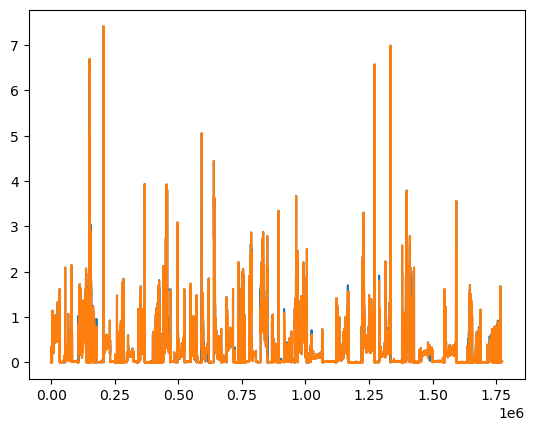

In [70]:
EDA_OG[0].plot() #Data matches
EDA_test[0][::2].plot()

In [72]:
length

28370518

In [75]:
upsampling_factor=int(length/len(EDA_OG))

In [76]:
upsampling_factor

16

<AxesSubplot:>

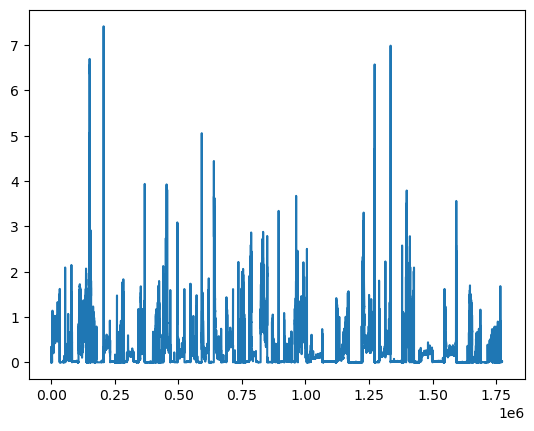

In [68]:
EDA_test[0][::2].plot()

In [94]:
final_EDA_test=resample(EDA_OG, replace=True, n_samples=length)

In [97]:
final_EDA_test=final_EDA_test.sort_index()

In [84]:
EDA.iloc[10000*16]

0           0.474217
Subject           S5
Test       Midterm 2
Score           0.77
Name: 160000, dtype: object

In [85]:
EDA_OG.iloc[10000]

0           0.475498
Subject           S5
Test       Midterm 2
Score           0.77
Name: 10000, dtype: object

<AxesSubplot:>

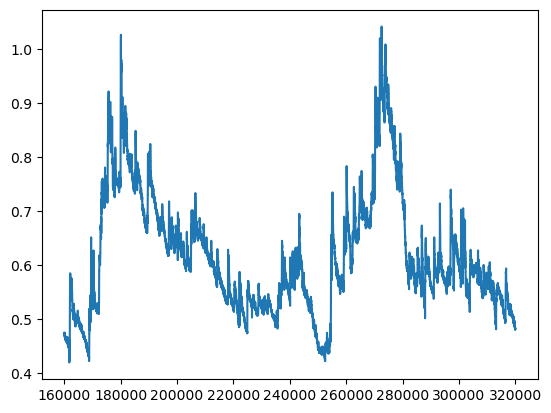

In [88]:
EDA[0][10000*16:20000*16].plot()

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_1020/3033095137.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  EDA_test[0][10000*2:20000*2].plot(sharex=True)
/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_1020/3033095137.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  final_EDA_test[0][10000*16:20000*16].plot(sharex=True)


<AxesSubplot:>

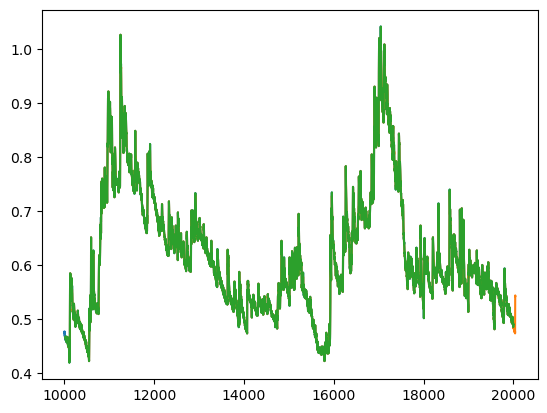

In [98]:
EDA_OG[0][10000:20000].plot(sharex=True)
EDA_test[0][10000*2:20000*2].plot(sharex=True)
final_EDA_test[0][10000*16:20000*16].plot(sharex=True) #Validate the resmapling method..all looks the same

In [101]:
print(EDA_OG[0].mean())
print(EDA_OG[0].std())

print(EDA_test[0].mean()) #Upsampled by factor of 2
print(EDA_test[0].std())

print(final_EDA_test[0].mean())
print(final_EDA_test[0].std()) #Updampled by factor of 16

0.26008439247089876
0.39807888302621985
0.26042640339035145
0.39908241674997
0.26011511339761245
0.3981227579880438


In [116]:
eda_og_2=EDA_OG[EDA_OG['Test']=='Midterm 2']

In [117]:
eda_og_2 #Original number of samples in EDA for midterm 2

,0,Subject,Test,Score
0,0.000000,S5,Midterm 2,0.77
1,0.002562,S5,Midterm 2,0.77
2,0.021776,S5,Midterm 2,0.77
3,0.021776,S5,Midterm 2,0.77
4,0.019214,S5,Midterm 2,0.77
...,...,...,...,...
484243,0.015375,S9,Midterm 2,0.39
484244,0.014094,S9,Midterm 2,0.39
484245,0.015375,S9,Midterm 2,0.39
484246,0.014094,S9,Midterm 2,0.39


In [115]:
eda_2 #number of samples in midterm 2 when upsamples by 16

,0,Subject,Test,Score
0,0.000000,S5,Midterm 2,0.77
1,0.000000,S5,Midterm 2,0.77
2,0.000000,S5,Midterm 2,0.77
3,0.000000,S5,Midterm 2,0.77
4,0.000000,S5,Midterm 2,0.77
...,...,...,...,...
7747148,0.015375,S9,Midterm 2,0.39
7747149,0.015375,S9,Midterm 2,0.39
7747150,0.015375,S9,Midterm 2,0.39
7747151,0.015375,S9,Midterm 2,0.39


In [113]:
another_EDA_test=final_list[7].sort_index()
another_EDA_test #Final number of samples for EDA midterm 2 when i equalled out the within subject number of samples

,0,Subject,Test,Score
0,0.000000,S5,Midterm 2,0.77
1,0.000000,S5,Midterm 2,0.77
1,0.000000,S5,Midterm 2,0.77
1,0.000000,S5,Midterm 2,0.77
1,0.000000,S5,Midterm 2,0.77
...,...,...,...,...
7747147,0.015375,S9,Midterm 2,0.39
7747148,0.015375,S9,Midterm 2,0.39
7747149,0.015375,S9,Midterm 2,0.39
7747151,0.015375,S9,Midterm 2,0.39


<AxesSubplot:>

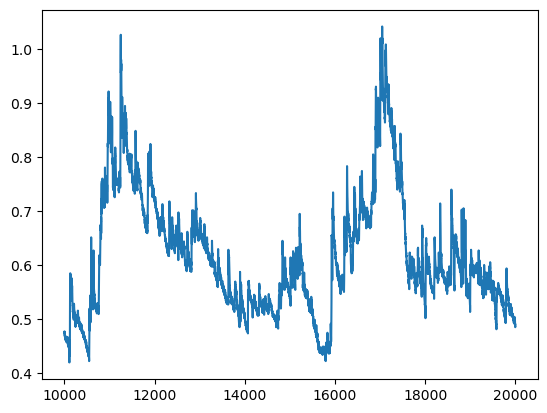

In [121]:
eda_og_2[0][10000:20000].plot()

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_1020/1672126744.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  another_EDA_test[0][10000*16:20000*16].plot(xlabel='')


<AxesSubplot:>

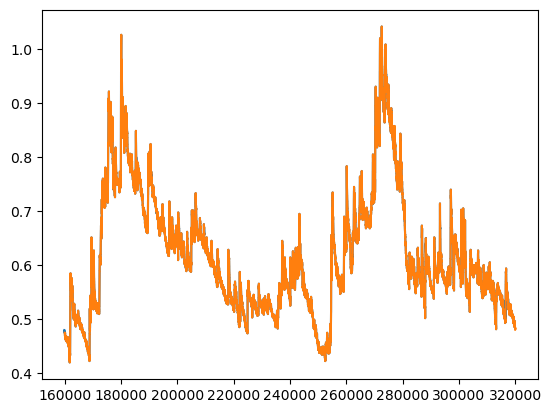

In [125]:
another_EDA_test[0][10000*16:20000*16].plot(xlabel='') #So my final resmapled data still looks comparable
eda_2[0][10000*16:20000*16].plot(xlabel='')

In [63]:
final_list[5]

,0,Subject,Test,Score
5075668,5.03,S1,Midterm 2,0.82
4787794,-29.45,S1,Midterm 2,0.82
5036561,12.16,S1,Midterm 2,0.82
4666318,248.39,S1,Midterm 2,0.82
5241249,0.36,S1,Midterm 2,0.82
...,...,...,...,...
7681283,-4.54,S9,Midterm 2,0.39
7269964,-29.21,S9,Midterm 2,0.39
7565531,7.12,S9,Midterm 2,0.39
7507910,-2.21,S9,Midterm 2,0.39


In [159]:
all_exam_sensors=[pd.concat(final_list[i::5]) for i in range(5)]

In [28]:
result_1

[              0 Subject       Test  Score
 12650351  -0.39      S1  Midterm 1   0.78
 12367434  -0.61      S1  Midterm 1   0.78
 12736472  -0.74      S1  Midterm 1   0.78
 12771860  -1.08      S1  Midterm 1   0.78
 12367711   0.29      S1  Midterm 1   0.78
 ...         ...     ...        ...    ...
 14901113  -0.47      S9  Midterm 1   0.80
 14967224 -11.74      S9  Midterm 1   0.80
 14976483   0.37      S9  Midterm 1   0.80
 14892874   2.43      S9  Midterm 1   0.80
 14511428   0.07      S9  Midterm 1   0.80
 
 [7526499 rows x 4 columns],
            0   1   2 Subject       Test  Score
 12286268  -2  64  11      S1  Midterm 1   0.78
 12932082  -3 -62  10      S1  Midterm 1   0.78
 12524729 -38   8  51      S1  Midterm 1   0.78
 12284405  -2  64  11      S1  Midterm 1   0.78
 12549578 -64  -8  -8      S1  Midterm 1   0.78
 ...       ..  ..  ..     ...        ...    ...
 14608328  -3  63  10      S9  Midterm 1   0.80
 15030032 -66   1 -21      S9  Midterm 1   0.80
 14931483 -40 -40 -16

In [29]:
result_2

[              0 Subject       Test  Score
 5075668    5.03      S1  Midterm 2   0.82
 4787794  -29.45      S1  Midterm 2   0.82
 5036561   12.16      S1  Midterm 2   0.82
 4666318  248.39      S1  Midterm 2   0.82
 5241249    0.36      S1  Midterm 2   0.82
 ...         ...     ...        ...    ...
 7681283   -4.54      S9  Midterm 2   0.39
 7269964  -29.21      S9  Midterm 2   0.39
 7565531    7.12      S9  Midterm 2   0.39
 7507910   -2.21      S9  Midterm 2   0.39
 7456013   22.22      S9  Midterm 2   0.39
 
 [7736469 rows x 4 columns],
           0   1   2 Subject       Test  Score
 4776193 -38 -47 -23      S1  Midterm 2   0.82
 5148528 -63 -17  -6      S1  Midterm 2   0.82
 4952771 -15  -5  60      S1  Midterm 2   0.82
 5221804  -5  65   2      S1  Midterm 2   0.82
 4669417 -40  92 -14      S1  Midterm 2   0.82
 ...      ..  ..  ..     ...        ...    ...
 7614398 -59   1 -28      S9  Midterm 2   0.39
 7218127 -58   3  52      S9  Midterm 2   0.39
 7265765 -41   2  52      S9  

In [23]:
#A) Develop model to train data on Midterm 1 and midterm 2 and predict final score

test=result_1[0]

midterm_1_labels=test[['Subject', 'Test', 'Score']]
midterm_1_features=[i.drop(columns=['Subject', 'Test', 'Score']) for i in result_1]
midterm_1_features=[i.reset_index(drop=True) for i in midterm_1_features]
midterm_1_labels=midterm_1_labels.reset_index(drop=True)

In [24]:
midterm_1_features=pd.concat(midterm_1_features, axis=1)

In [53]:
print(midterm_1_features.iloc[:,0].mean())
print(midterm_1_features.iloc[:,0].std())

0.005825723221380881
9.091763267515883


In [26]:
#Repeat same code as above for midterm 2

sample=result_2[0]
midterm_2_labels=sample[['Subject', 'Test', 'Score']]

midterm_2_features=[i.drop(columns=['Subject', 'Test', 'Score']) for i in result_2]
midterm_2_features=[i.reset_index(drop=True) for i in midterm_2_features]
midterm_2_labels=midterm_2_labels.reset_index(drop=True)

midterm_2_features=pd.concat(midterm_2_features, axis=1)

In [52]:
print(midterm_2_features.iloc[:,0].mean())
print(midterm_2_features.iloc[:,0].std()) #Something to look at here, if the massive std difference
        #was a single subject and perhaps removing them from analysis. Also column at index 3 had big mean difference

-0.009967573062077843
95.62306217064867


In [93]:
(len(midterm_1_features)+len(midterm_2_features))/42

363404.0

In [191]:
#Developing and scaling features
model_1_features=pd.concat([midterm_2_features, midterm_1_features], axis=0)
model_1_features=preprocessing.StandardScaler().fit_transform(model_1_features)
model_1_features.shape

(15262968, 7)

In [192]:
model_1_features=model_1_features.reshape(-1,42,7) #Splice up data in some window

In [193]:
model_1_features.shape

(363404, 42, 7)

In [117]:
model_1_labels=pd.concat([midterm_1_labels['Score'], midterm_2_labels['Score']], axis=0)

In [96]:
#Developing labels
model_1_labels=pd.concat([midterm_1_labels['Score'], midterm_2_labels['Score']], axis=0)
modes=[]
for i in range(0, len(model_1_labels), 42):
    batch = model_1_labels[i:i+42]
    mode = stats.mode(batch)[0][0]
    # Append the mode to the new array
    modes.append(mode)
model_1_labels=np.asarray(modes)

In [143]:
model_1_labels=model_1_labels.reshape(-1,1)

In [194]:
model_1_labels.shape

(363404, 1)

In [196]:
model_1_labels

array([[0.78],
       [0.78],
       [0.78],
       ...,
       [0.39],
       [0.39],
       [0.39]])

In [243]:
#A) Performance Prediction model

inputs=tf.keras.Input(shape=(1,7))
x=keras.layers.LSTM(256, return_sequences=True)(inputs)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.LSTM(128, return_sequences=True)(x)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.LSTM(64, return_sequences=True)(x)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.Dense(32, activation='relu')(x)
z=keras.layers.Dense(1, activation='relu')(x)

model_1=keras.Model(inputs=inputs, outputs=z, name='simple LSTM')

model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

model_1.summary()

Model: "simple LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 1, 7)]            0         
                                                                 
 lstm_35 (LSTM)              (None, 1, 256)            270336    
                                                                 
 dropout_17 (Dropout)        (None, 1, 256)            0         
                                                                 
 lstm_36 (LSTM)              (None, 1, 128)            197120    
                                                                 
 dropout_18 (Dropout)        (None, 1, 128)            0         
                                                                 
 lstm_37 (LSTM)              (None, 1, 64)             49408     
                                                                 
 dropout_19 (Dropout)        (None, 1, 64)             

In [244]:
model_1_features=model_1_features.reshape(-1,1,7) #redoing the shape of input data because test data is different

In [246]:
model_1_labels=pd.concat([midterm_1_labels['Score'], midterm_2_labels['Score']], axis=0)

In [248]:
model_1_labels=model_1_labels.to_numpy()

In [249]:
model_1.fit(model_1_features, model_1_labels, validation_split=0.2, epochs=3, batch_size=5000, verbose=1)

/Users/jaredperez/opt/miniconda3/envs/tf/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/3
2443/2443 [==============================] - 239s 96ms/step - loss: 0.0094 - mae: 0.0713 - val_loss: 0.0948 - val_mae: 0.2678
Epoch 2/3
2443/2443 [==============================] - 239s 98ms/step - loss: 0.0069 - mae: 0.0658 - val_loss: 0.0885 - val_mae: 0.2594
Epoch 3/3
2443/2443 [==============================] - 253s 103ms/step - loss: 0.0069 - mae: 0.0658 - val_loss: 0.1010 - val_mae: 0.2755


In [205]:
#Develop the Test Set (i.e finals scores)

test=result_3[0]

final_labels=test[['Subject', 'Test', 'Score']]
final_x_test=[i.drop(columns=['Subject', 'Test', 'Score']) for i in result_3]
final_x_test=[i.reset_index(drop=True) for i in final_x_test]
final_y_test=final_labels.reset_index(drop=True)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (5, 13071692) + inhomogeneous part.

In [208]:
final_x_test=pd.concat([i for i in final_x_test], axis=1)

In [220]:
import math

def factors(n):
    factors = []
    for i in range(1, int(math.sqrt(n))+1): #+1 because range stops 1 number short
        if n % i == 0:
            factors.append(i)
            if i != n // i: #Check if perfect square root
                factors.append(n//i)
    return factors

print(factors(13071692))

[1, 13071692, 2, 6535846, 4, 3267923, 29, 450748, 58, 225374, 116, 112687]


In [221]:
final_x_test=preprocessing.StandardScaler().fit_transform(final_x_test)

In [240]:
final_x_test=final_x_test.reshape(-1,1,7)

In [242]:
final_x_test.shape

(13071692, 1, 7)

In [251]:
final_y_test=final_labels['Score'].to_numpy()

In [250]:
final_y_test.shape

(225374, 1)

In [232]:
modes=[]
for i in range(0, len(final_y_test), 58):
    batch = final_y_test[i:i+58]
    mode = stats.mode(batch)[0][0]
    # Append the mode to the new array
    modes.append(mode)
final_y_test=np.asarray(modes)

/var/folders/wv/c3g7vgxd10n0mdl2_flcjj480000gn/T/ipykernel_2861/178294602.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(batch)[0][0]


In [238]:
final_y_test=final_y_test.reshape(-1,1)

In [252]:
model_1.evaluate(x=final_x_test, y=final_y_test, verbose=1, batch_size=1000)

/Users/jaredperez/opt/miniconda3/envs/tf/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


13072/13072 [==============================] - 272s 21ms/step - loss: 0.0207 - mae: 0.1285


[0.020731130614876747, 0.12848584353923798]

In [253]:
final_grades_predictions=model_1.predict(final_x_test, batch_size=1000)

13072/13072 [==============================] - 222s 17ms/step


In [273]:
final_grades_predictions=final_grades_predictions.flatten()

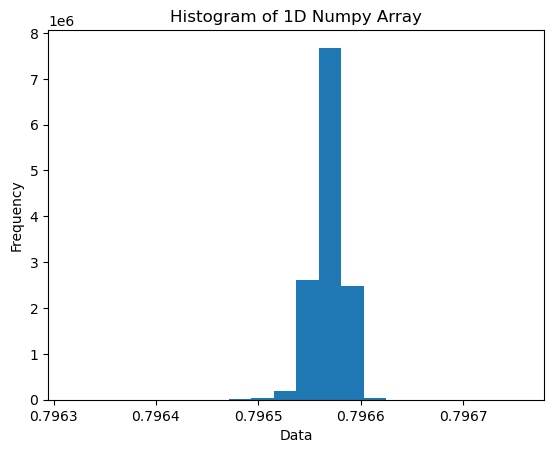

In [274]:
plt.hist(final_grades_predictions, bins=20)

plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Histogram of Performance Predictions with all Scores Included')
plt.show()`

In [278]:
#A2) 2nd Performance Prediction Model..more complex architecture

inputs=tf.keras.Input(shape=(1,7))
x=keras.layers.Dense(256, activation='relu')(inputs)
y=keras.layers.GRU(256, return_sequences=True)(x)

attention=keras.layers.Attention()([x,y])

x=keras.layers.Dense(128, activation='relu')(attention)
y=keras.layers.GRU(128, return_sequences=True)(x)

attention2=keras.layers.Attention()([x,y])

x=keras.layers.GRU(64)(attention2)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.Dense(32, activation='relu')(x)
x=keras.layers.Dense(1, activation='relu')(x)

model_2=keras.Model(inputs=inputs, outputs=x, name='GRU Attention')

model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

model_2.summary()

Model: "GRU Attention"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None, 1, 7)]       0           []                               
                                                                                                  
 dense_55 (Dense)               (None, 1, 256)       2048        ['input_19[0][0]']               
                                                                                                  
 gru_6 (GRU)                    (None, 1, 256)       394752      ['dense_55[0][0]']               
                                                                                                  
 attention_12 (Attention)       (None, 1, 256)       0           ['dense_55[0][0]',               
                                                                  'gru_6[0][0]']      

In [279]:
model_1_labels

array([0.78, 0.78, 0.78, ..., 0.39, 0.39, 0.39])

In [280]:
model_2.fit(model_1_features, model_1_labels, batch_size=10000, verbose=1, epochs=3)

/Users/jaredperez/opt/miniconda3/envs/tf/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/3
1527/1527 [==============================] - 246s 160ms/step - loss: 0.0191 - mae: 0.1023
Epoch 2/3
1527/1527 [==============================] - 235s 154ms/step - loss: 0.0133 - mae: 0.0825
Epoch 3/3
1527/1527 [==============================] - 226s 148ms/step - loss: 0.0120 - mae: 0.0768


In [281]:
final_grades_predictions2=model_2.predict(final_x_test, batch_size=10000, verbose=1)

/Users/jaredperez/opt/miniconda3/envs/tf/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1308/1308 [==============================] - 55s 42ms/step


In [282]:
final_grades_predictions2

array([[0.7592111 ],
       [0.67758113],
       [0.76907057],
       ...,
       [0.7787059 ],
       [0.7328728 ],
       [0.80576503]], dtype=float32)

In [288]:
model_2.evaluate(final_x_test, final_y_test, batch_size=10000, verbose=1)

/Users/jaredperez/opt/miniconda3/envs/tf/lib/python3.10/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1308/1308 [==============================] - 55s 42ms/step - loss: 0.0213 - mae: 0.1308


[0.021272964775562286, 0.13077592849731445]

In [ ]:
#A3) Performance Predictions with less of a range of values

model_1_features=pd.concat([midterm_2_features, midterm_1_features], axis=0)
model_1_labels=pd.Series(model_1_labels)

len(model_1_labels)==len(model_1_features)

In [164]:
#B) Develop model to classify the exams

In [ ]:
#C) Develop model to classify the student

In [ ]:
#To get more data, I can look at low scores, high scores, middle scores and see where the data falls 
    #maybe try increase amount of data according to scores
    #Data Augmentation...make it realsitic of data in test set, does not help for it to be random
    #Can also synthesis training examples